In [474]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf

In [475]:
'''1 load dataset
2 shuffle data
3 split training ,testing and validation
4 split inputs and labels(output)
5 one hot encoding 
6 fit model without validation
7 fit model with validation(with history)
8 create graph
9 adjust ephoc based on graph
10 check train and test accuaries are match or not 
( ch 3 3:17-20)'''

'1 load dataset\n2 shuffle data\n3 split training ,testing and validation\n4 split inputs and labels(output)\n5 one hot encoding \n6 fit model without validation\n7 fit model with validation(with history)\n8 create graph\n9 adjust ephoc based on graph\n10 check train and test accuaries are match or not \n( ch 3 3:17-20)'

In [476]:
# data loading
no = list(np.arange(61))
df = pd.read_csv("sonar.csv",names=no)
df.shape

(208, 61)

In [477]:
# data shuffling
df = df.sample(frac=1)

In [478]:
# One hot coding 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
#df.iloc[:,60]
  
# Encode labels in column 'species'. 
df.iloc[:,60]= label_encoder.fit_transform(df.iloc[:,60]) 
np.unique(df.iloc[:,60])

array([0, 1])

In [479]:
features = df.iloc[:,:60].values
labels = df.iloc[:,60].values

In [510]:
x_train = features[:104]
y_train = labels[:104]
x_test = features[104:167]
y_test = labels[104:167]
x_val = features[167:]
y_val = labels[167:]

In [507]:
import matplotlib.pyplot as plt

# K-Fold validation

In [556]:
k = 4
num_samples = len(features)//k
scores = []

for i in range(k):
    print("processing fold : ",i)
    val_x  = features[i*num_samples:(i+1)*num_samples]
    val_y  = labels[i*num_samples:(i+1)*num_samples]
    train_x  = np.concatenate([features[:i*num_samples],features[(i+1)*num_samples:]],axis=0)
    train_y  = np.concatenate([labels[:i*num_samples],labels[(i+1)*num_samples:]],axis=0)
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(512, activation='relu', input_shape=(60,)),# input shape required
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_x,train_y, epochs=25, batch_size=32 ,validation_data=(val_x,val_y))
    loss,acc = model.evaluate(val_x,val_y, verbose=2)
    scores.append(acc)
    


processing fold :  0
Train on 156 samples, validate on 52 samples
Epoch 1/25
156/156 [==============================] - 2s 13ms/sample - loss: 0.6339 - accuracy: 0.6667 - val_loss: 0.9126 - val_accuracy: 0.4231
Epoch 2/25
156/156 [==============================] - 0s 930us/sample - loss: 0.5822 - accuracy: 0.6603 - val_loss: 0.8650 - val_accuracy: 0.4808
Epoch 3/25
156/156 [==============================] - 0s 1ms/sample - loss: 0.5199 - accuracy: 0.7500 - val_loss: 0.6379 - val_accuracy: 0.5769
Epoch 4/25
156/156 [==============================] - 0s 692us/sample - loss: 0.4879 - accuracy: 0.7885 - val_loss: 0.5938 - val_accuracy: 0.6731
Epoch 5/25
156/156 [==============================] - 0s 846us/sample - loss: 0.5050 - accuracy: 0.7628 - val_loss: 0.8160 - val_accuracy: 0.5192
Epoch 6/25
156/156 [==============================] - 0s 667us/sample - loss: 0.5055 - accuracy: 0.7308 - val_loss: 0.8105 - val_accuracy: 0.5192
Epoch 7/25
156/156 [==============================] - 0s 642u

Epoch 5/25
156/156 [==============================] - 0s 686us/sample - loss: 0.5615 - accuracy: 0.7244 - val_loss: 0.4818 - val_accuracy: 0.7885
Epoch 6/25
156/156 [==============================] - 0s 641us/sample - loss: 0.5128 - accuracy: 0.7821 - val_loss: 0.6878 - val_accuracy: 0.5577
Epoch 7/25
156/156 [==============================] - 0s 666us/sample - loss: 0.5014 - accuracy: 0.7564 - val_loss: 0.4572 - val_accuracy: 0.7885
Epoch 8/25
156/156 [==============================] - 0s 615us/sample - loss: 0.4851 - accuracy: 0.7756 - val_loss: 0.4266 - val_accuracy: 0.8077
Epoch 9/25
156/156 [==============================] - 0s 615us/sample - loss: 0.4589 - accuracy: 0.7949 - val_loss: 0.4308 - val_accuracy: 0.7885
Epoch 10/25
156/156 [==============================] - 0s 615us/sample - loss: 0.4702 - accuracy: 0.7821 - val_loss: 0.4166 - val_accuracy: 0.7885
Epoch 11/25
156/156 [==============================] - 0s 641us/sample - loss: 0.4378 - accuracy: 0.8590 - val_loss: 0.3992

In [557]:
loss = history.history["lossa"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]


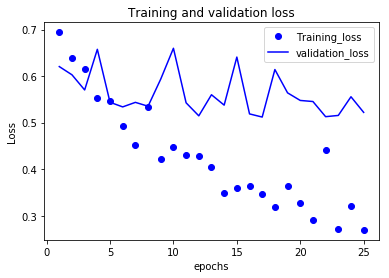

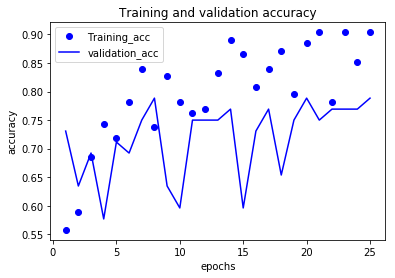

In [569]:
# for loss
 
epochs = range(1, len(acc)+1)
plt.plot(epochs,loss,"bo",label = "Training_loss")
plt.plot(epochs,val_loss,"b",label = "validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# for accuracy
 
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc)+1)
plt.plot(epochs,acc,"bo",label = "Training_acc")
plt.plot(epochs,val_acc,"b",label = "validation_acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

In [570]:
# validation data mean score
print(scores)
np.mean(scores)

[0.78846157, 0.8076923, 0.75, 0.78846157]


0.78365386

In [571]:
# evaluation on test data
evaluation = model.evaluate(x_test,  y_test, verbose=2)

63/1 - 0s - loss: 0.2739 - accuracy: 0.9683


In [572]:
m = model.predict_classes(x_test[7:8])
print("predicted:",m)
print("true:",y_test[7:8])

predicted: [[1]]
true: [1]
